#Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


#Data

In [ ]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset for Thesis/Dataset.pkl')
print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [ ]:
data.shape

(255919, 61)

In [ ]:

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Model

In [ ]:

models = {"Logistic Regression": LogisticRegression(solver="liblinear", C=1, penalty="l1", max_iter=1000, class_weight="balanced") }

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

Training Logistic Regression with Cross-Validation
Mean Threshold for Logistic Regression: 0.76
Training Random Forest with Cross-Validation
Mean Threshold for Random Forest: 0.39
Training Decision Tree with Cross-Validation
Mean Threshold for Decision Tree: 0.85
Training KNN with Cross-Validation
Mean Threshold for KNN: 0.34
Training Gradient Boosting with Cross-Validation
Mean Threshold for Gradient Boosting: 0.33
Training Extra Trees with Cross-Validation
Mean Threshold for Extra Trees: 0.62
Training Linear Discriminant Analysis (LDA) with Cross-Validation
Mean Threshold for Linear Discriminant Analysis (LDA): 0.18
Training Quadratic Discriminant Analysis (QDA) with Cross-Validation


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Mean Threshold for Quadratic Discriminant Analysis (QDA): 0.20

Cross-validation Metrics for Logistic Regression:
  Fold 1:
    Accuracy: 0.9211
    Precision: 0.6369
    Recall: 0.6710
    F1: 0.6535
    ROC AUC: 0.9333
    PR AUC: 0.7013
    Class Accuracies: {'non_bankrupt': 0.9523202671822816, 'bankrupt': 0.671015514809591}
  Fold 2:
    Accuracy: 0.9172
    Precision: 0.6119
    Recall: 0.6904
    F1: 0.6488
    ROC AUC: 0.9310
    PR AUC: 0.6869
    Class Accuracies: {'non_bankrupt': 0.9454209878713307, 'bankrupt': 0.6904090267983075}
  Fold 3:
    Accuracy: 0.9230
    Precision: 0.6534
    Recall: 0.6495
    F1: 0.6515
    ROC AUC: 0.9329
    PR AUC: 0.6844
    Class Accuracies: {'non_bankrupt': 0.9570662682369485, 'bankrupt': 0.6495063469675599}
  Fold 4:
    Accuracy: 0.9217
    Precision: 0.6440
    Recall: 0.6559
    F1: 0.6499
    ROC AUC: 0.9355
    PR AUC: 0.6866
    Class Accuracies: {'non_bankrupt': 0.9548251010722447, 'bankrupt': 0.6558533145275035}
  Fold 5:
    Accur

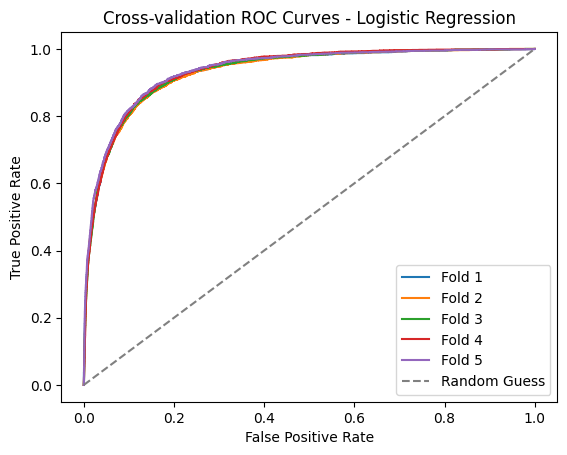

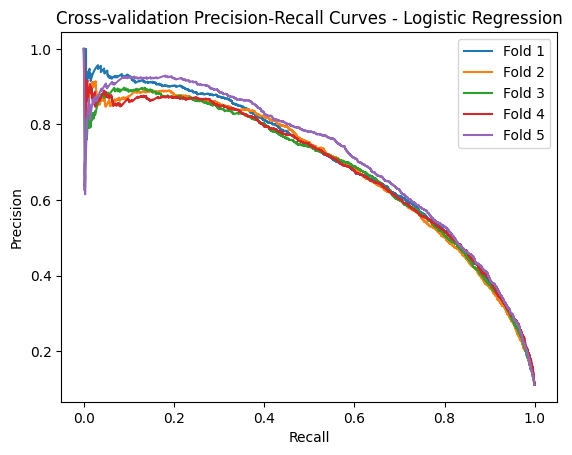


Cross-validation Metrics for Random Forest:
  Fold 1:
    Accuracy: 0.9382
    Precision: 0.7151
    Recall: 0.7355
    F1: 0.7252
    ROC AUC: 0.9600
    PR AUC: 0.7985
    Class Accuracies: {'non_bankrupt': 0.9634821585515908, 'bankrupt': 0.735543018335684}
  Fold 2:
    Accuracy: 0.9336
    Precision: 0.6930
    Recall: 0.7197
    F1: 0.7061
    ROC AUC: 0.9554
    PR AUC: 0.7839
    Class Accuracies: {'non_bankrupt': 0.9602742133942697, 'bankrupt': 0.7196755994358252}
  Fold 3:
    Accuracy: 0.9340
    Precision: 0.6875
    Recall: 0.7422
    F1: 0.7138
    ROC AUC: 0.9556
    PR AUC: 0.7859
    Class Accuracies: {'non_bankrupt': 0.957945157321146, 'bankrupt': 0.7422425952045134}
  Fold 4:
    Accuracy: 0.9350
    Precision: 0.6876
    Recall: 0.7581
    F1: 0.7211
    ROC AUC: 0.9600
    PR AUC: 0.7961
    Class Accuracies: {'non_bankrupt': 0.9570662682369485, 'bankrupt': 0.7581100141043724}
  Fold 5:
    Accuracy: 0.9372
    Precision: 0.7169
    Recall: 0.7161
    F1: 0.7165
  

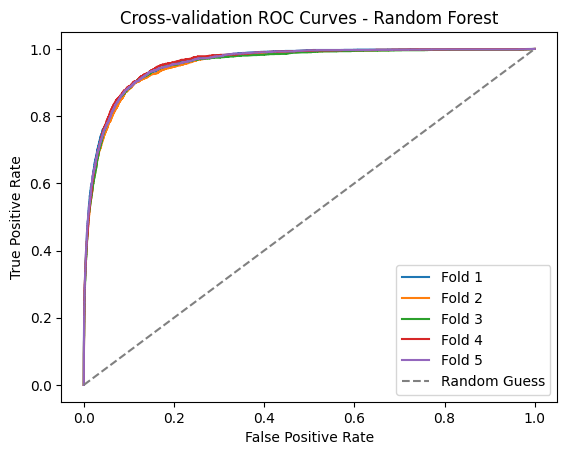

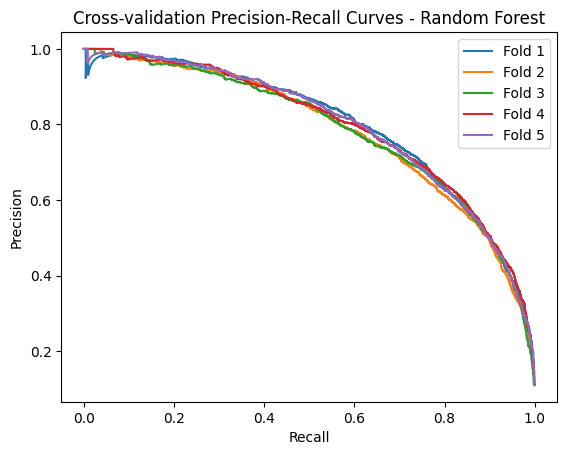


Cross-validation Metrics for Decision Tree:
  Fold 1:
    Accuracy: 0.9147
    Precision: 0.6019
    Recall: 0.6788
    F1: 0.6381
    ROC AUC: 0.7754
    PR AUC: 0.4494
    Class Accuracies: {'non_bankrupt': 0.9440587097908244, 'bankrupt': 0.6787729196050776}
  Fold 2:
    Accuracy: 0.9099
    Precision: 0.5842
    Recall: 0.6495
    F1: 0.6151
    ROC AUC: 0.7908
    PR AUC: 0.4467
    Class Accuracies: {'non_bankrupt': 0.942388820530849, 'bankrupt': 0.6495063469675599}
  Fold 3:
    Accuracy: 0.9116
    Precision: 0.5891
    Recall: 0.6689
    F1: 0.6265
    ROC AUC: 0.7442
    PR AUC: 0.4403
    Class Accuracies: {'non_bankrupt': 0.9418614870803305, 'bankrupt': 0.6688998589562765}
  Fold 4:
    Accuracy: 0.9112
    Precision: 0.5837
    Recall: 0.6932
    F1: 0.6338
    ROC AUC: 0.7586
    PR AUC: 0.4418
    Class Accuracies: {'non_bankrupt': 0.9383898751977501, 'bankrupt': 0.6932299012693935}
  Fold 5:
    Accuracy: 0.9130
    Precision: 0.5933
    Recall: 0.6827
    F1: 0.6349
 

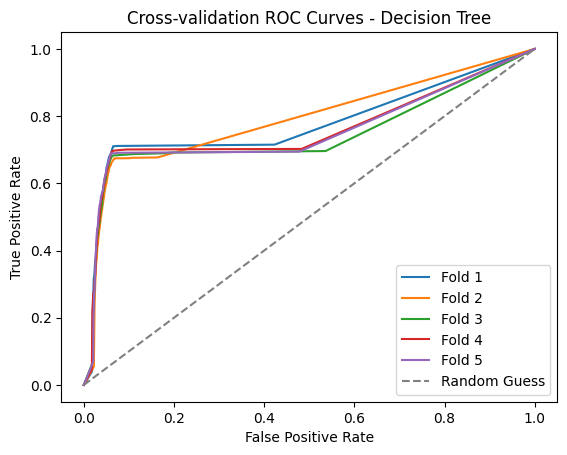

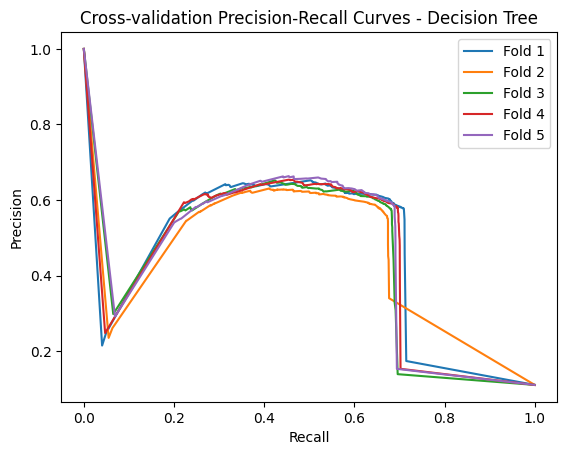


Cross-validation Metrics for KNN:
  Fold 1:
    Accuracy: 0.9172
    Precision: 0.6175
    Recall: 0.6654
    F1: 0.6405
    ROC AUC: 0.8796
    PR AUC: 0.6931
    Class Accuracies: {'non_bankrupt': 0.9486289330286518, 'bankrupt': 0.6653737658674189}
  Fold 2:
    Accuracy: 0.9165
    Precision: 0.6165
    Recall: 0.6520
    F1: 0.6338
    ROC AUC: 0.8795
    PR AUC: 0.6879
    Class Accuracies: {'non_bankrupt': 0.9494638776586395, 'bankrupt': 0.6519746121297603}
  Fold 3:
    Accuracy: 0.9216
    Precision: 0.6518
    Recall: 0.6283
    F1: 0.6399
    ROC AUC: 0.8762
    PR AUC: 0.6880
    Class Accuracies: {'non_bankrupt': 0.9581648795921954, 'bankrupt': 0.6283497884344147}
  Fold 4:
    Accuracy: 0.9154
    Precision: 0.6049
    Recall: 0.6823
    F1: 0.6413
    ROC AUC: 0.8841
    PR AUC: 0.6956
    Class Accuracies: {'non_bankrupt': 0.9444542098787133, 'bankrupt': 0.6822990126939351}
  Fold 5:
    Accuracy: 0.9168
    Precision: 0.6121
    Recall: 0.6798
    F1: 0.6442
    ROC AU

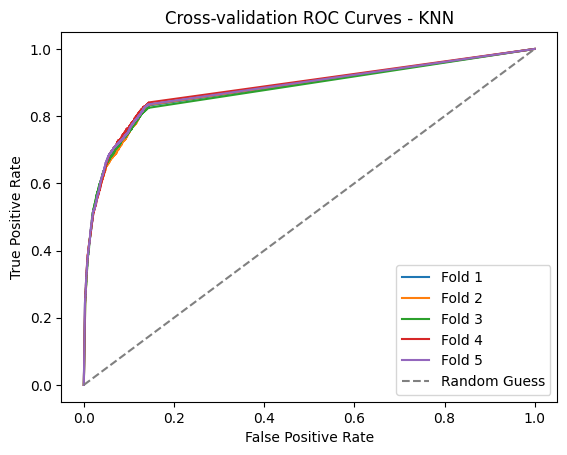

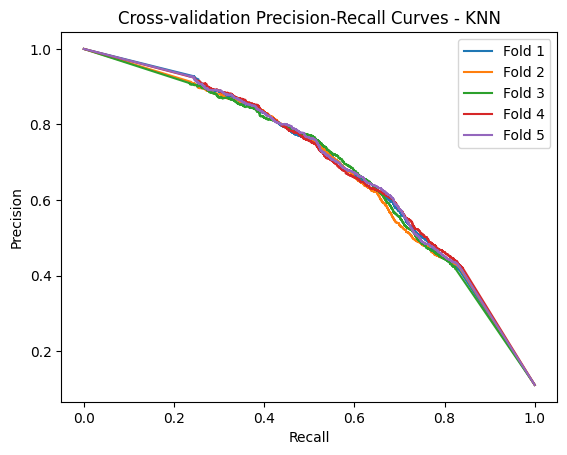


Cross-validation Metrics for Gradient Boosting:
  Fold 1:
    Accuracy: 0.9434
    Precision: 0.7700
    Recall: 0.6978
    F1: 0.7321
    ROC AUC: 0.9570
    PR AUC: 0.8065
    Class Accuracies: {'non_bankrupt': 0.9740288275619616, 'bankrupt': 0.6978138222849083}
  Fold 2:
    Accuracy: 0.9351
    Precision: 0.6949
    Recall: 0.7387
    F1: 0.7161
    ROC AUC: 0.9549
    PR AUC: 0.7948
    Class Accuracies: {'non_bankrupt': 0.9595711021269115, 'bankrupt': 0.7387165021156559}
  Fold 3:
    Accuracy: 0.9378
    Precision: 0.7153
    Recall: 0.7292
    F1: 0.7222
    ROC AUC: 0.9572
    PR AUC: 0.8003
    Class Accuracies: {'non_bankrupt': 0.9638337141852699, 'bankrupt': 0.7291960507757405}
  Fold 4:
    Accuracy: 0.9334
    Precision: 0.6700
    Recall: 0.7867
    F1: 0.7236
    ROC AUC: 0.9592
    PR AUC: 0.8059
    Class Accuracies: {'non_bankrupt': 0.9517050448233433, 'bankrupt': 0.7866713681241185}
  Fold 5:
    Accuracy: 0.9401
    Precision: 0.7300
    Recall: 0.7292
    F1: 0.7

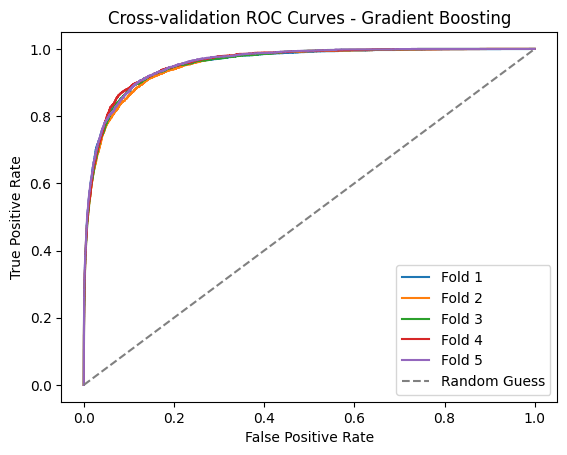

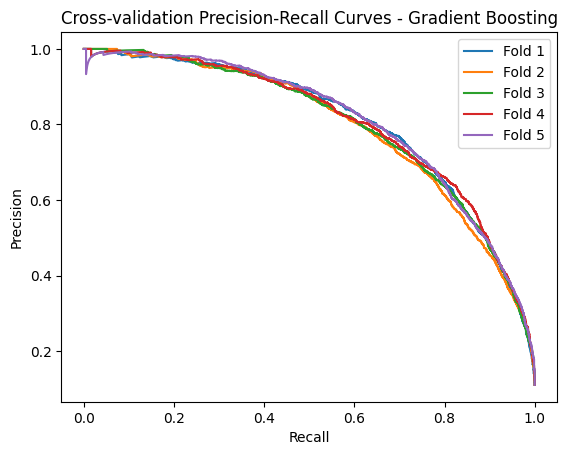


Cross-validation Metrics for Extra Trees:
  Fold 1:
    Accuracy: 0.9238
    Precision: 0.6444
    Recall: 0.6978
    F1: 0.6701
    ROC AUC: 0.9425
    PR AUC: 0.7285
    Class Accuracies: {'non_bankrupt': 0.9520126560028125, 'bankrupt': 0.6978138222849083}
  Fold 2:
    Accuracy: 0.9157
    Precision: 0.6005
    Recall: 0.7140
    F1: 0.6524
    ROC AUC: 0.9400
    PR AUC: 0.7215
    Class Accuracies: {'non_bankrupt': 0.9408068201792934, 'bankrupt': 0.714033850493653}
  Fold 3:
    Accuracy: 0.9173
    Precision: 0.6107
    Recall: 0.7003
    F1: 0.6524
    ROC AUC: 0.9392
    PR AUC: 0.7086
    Class Accuracies: {'non_bankrupt': 0.9443663209702935, 'bankrupt': 0.7002820874471086}
  Fold 4:
    Accuracy: 0.9199
    Precision: 0.6202
    Recall: 0.7151
    F1: 0.6643
    ROC AUC: 0.9439
    PR AUC: 0.7331
    Class Accuracies: {'non_bankrupt': 0.9454209878713307, 'bankrupt': 0.7150916784203103}
  Fold 5:
    Accuracy: 0.9240
    Precision: 0.6502
    Recall: 0.6791
    F1: 0.6644
   

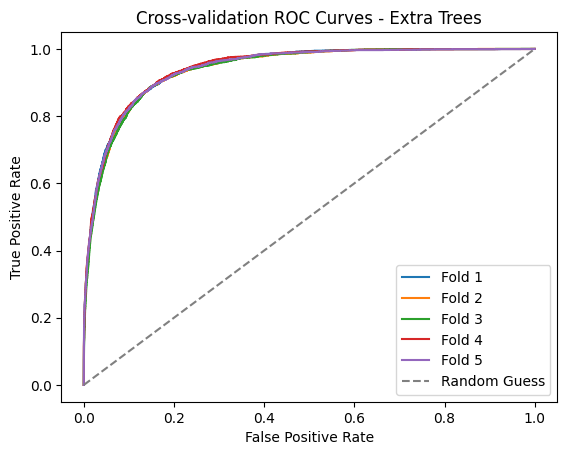

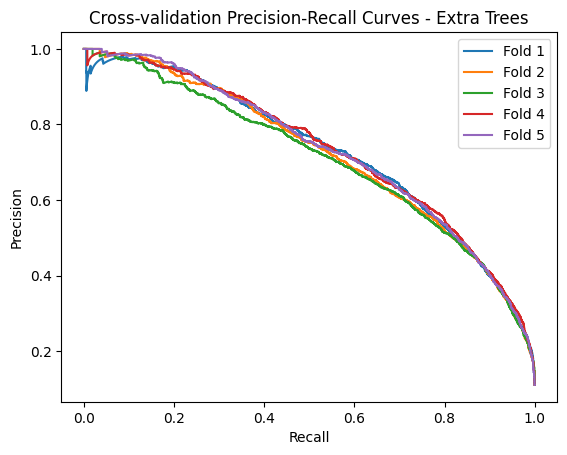


Cross-validation Metrics for Linear Discriminant Analysis (LDA):
  Fold 1:
    Accuracy: 0.9153
    Precision: 0.6128
    Recall: 0.6396
    F1: 0.6259
    ROC AUC: 0.9153
    PR AUC: 0.6657
    Class Accuracies: {'non_bankrupt': 0.949639655475479, 'bankrupt': 0.6396332863187588}
  Fold 2:
    Accuracy: 0.9143
    Precision: 0.6129
    Recall: 0.6164
    F1: 0.6146
    ROC AUC: 0.9133
    PR AUC: 0.6494
    Class Accuracies: {'non_bankrupt': 0.9514853225522939, 'bankrupt': 0.616361071932299}
  Fold 3:
    Accuracy: 0.9123
    Precision: 0.5965
    Recall: 0.6439
    F1: 0.6193
    ROC AUC: 0.9163
    PR AUC: 0.6481
    Class Accuracies: {'non_bankrupt': 0.9457285990507998, 'bankrupt': 0.6438645980253879}
  Fold 4:
    Accuracy: 0.9126
    Precision: 0.5969
    Recall: 0.6495
    F1: 0.6221
    ROC AUC: 0.9204
    PR AUC: 0.6561
    Class Accuracies: {'non_bankrupt': 0.9453330989629108, 'bankrupt': 0.6495063469675599}
  Fold 5:
    Accuracy: 0.9145
    Precision: 0.6092
    Recall: 0.6

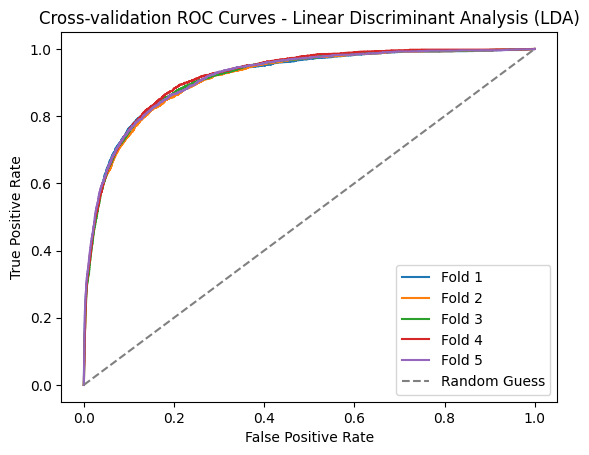

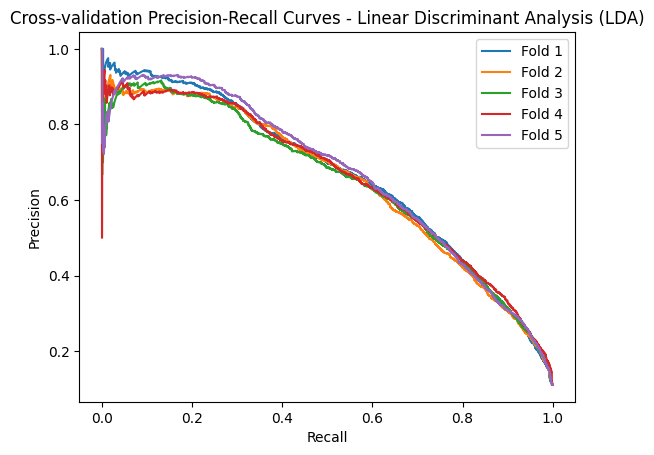


Cross-validation Metrics for Quadratic Discriminant Analysis (QDA):
  Fold 1:
    Accuracy: 0.8992
    Precision: 0.7667
    Recall: 0.1298
    F1: 0.2220
    ROC AUC: 0.8609
    PR AUC: 0.4602
    Class Accuracies: {'non_bankrupt': 0.9950782211284935, 'bankrupt': 0.12976022566995768}
  Fold 2:
    Accuracy: 0.8953
    Precision: 0.6566
    Recall: 0.1153
    F1: 0.1962
    ROC AUC: 0.8271
    PR AUC: 0.3942
    Class Accuracies: {'non_bankrupt': 0.9924854983301108, 'bankrupt': 0.11530324400564175}
  Fold 3:
    Accuracy: 0.8963
    Precision: 0.6842
    Recall: 0.1192
    F1: 0.2030
    ROC AUC: 0.8244
    PR AUC: 0.3940
    Class Accuracies: {'non_bankrupt': 0.9931446651432589, 'bankrupt': 0.11918194640338504}
  Fold 4:
    Accuracy: 0.8959
    Precision: 0.6693
    Recall: 0.1199
    F1: 0.2033
    ROC AUC: 0.8307
    PR AUC: 0.3973
    Class Accuracies: {'non_bankrupt': 0.9926173316927404, 'bankrupt': 0.11988716502115655}
  Fold 5:
    Accuracy: 0.9000
    Precision: 0.7875
    Re

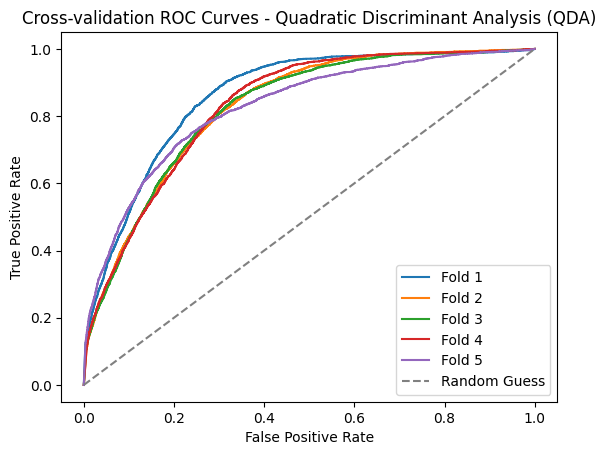

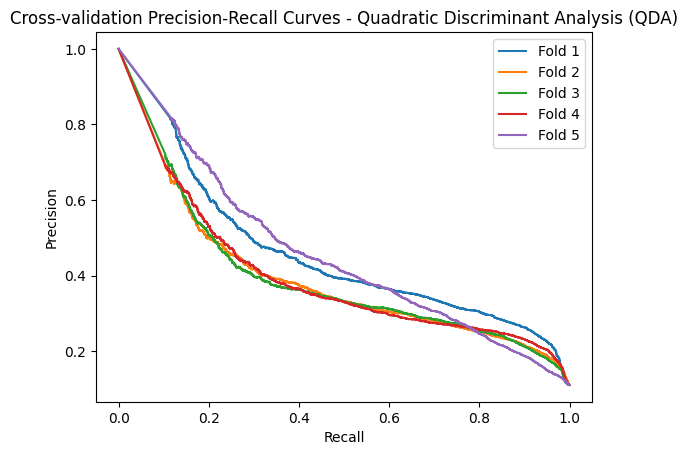


Final Training for Logistic Regression

Final Metrics for Logistic Regression:
  Accuracy: 0.6749
  Precision: 0.2499
  Recall: 0.9662
  F1 Score: 0.3971
  ROC AUC: 0.9369
  PR AUC: 0.7084
  Class Accuracies: {'non_bankrupt': 0.6385656530145896, 'bankrupt': 0.9662200282087448}


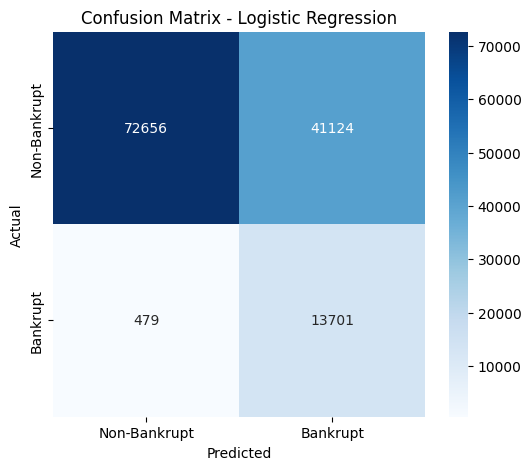

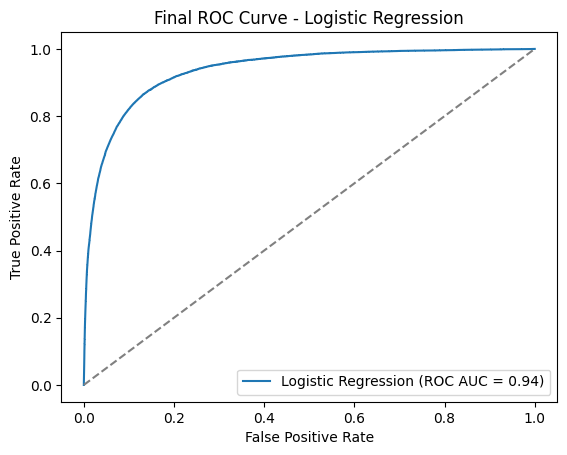

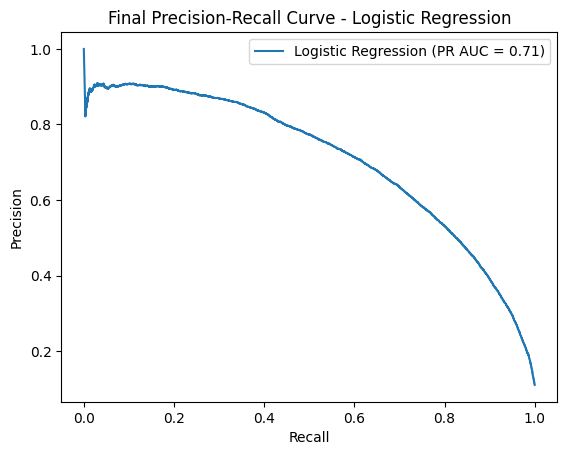


Final Training for Random Forest

Final Metrics for Random Forest:
  Accuracy: 0.9105
  Precision: 0.5620
  Recall: 0.8713
  F1 Score: 0.6833
  ROC AUC: 0.9605
  PR AUC: 0.8025
  Class Accuracies: {'non_bankrupt': 0.9153805589734576, 'bankrupt': 0.8712976022566996}


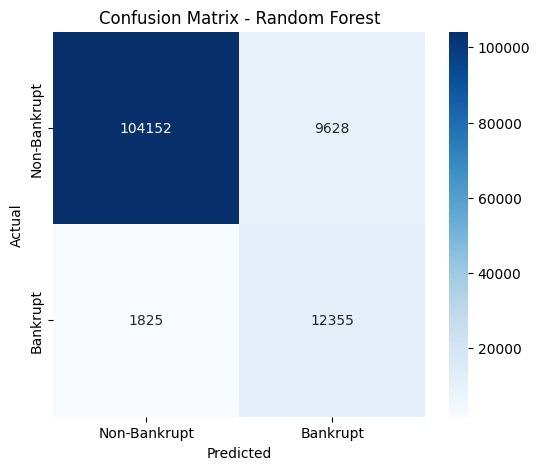

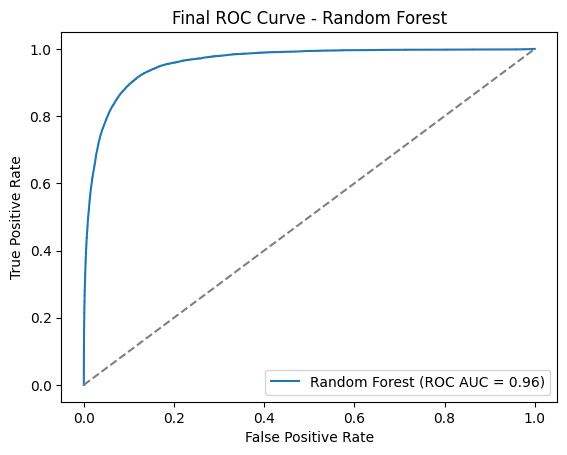

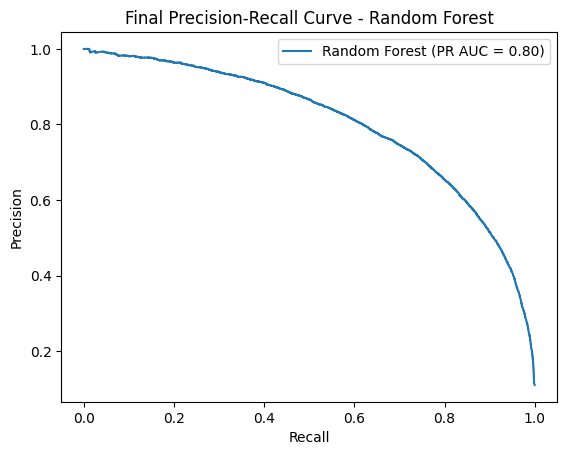


Final Training for Decision Tree

Final Metrics for Decision Tree:
  Accuracy: 0.9098
  Precision: 0.5758
  Recall: 0.7078
  F1 Score: 0.6350
  ROC AUC: 0.7699
  PR AUC: 0.4573
  Class Accuracies: {'non_bankrupt': 0.9350061522235894, 'bankrupt': 0.7078279266572638}


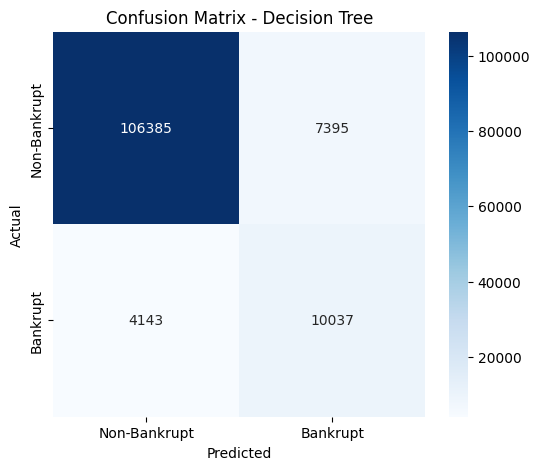

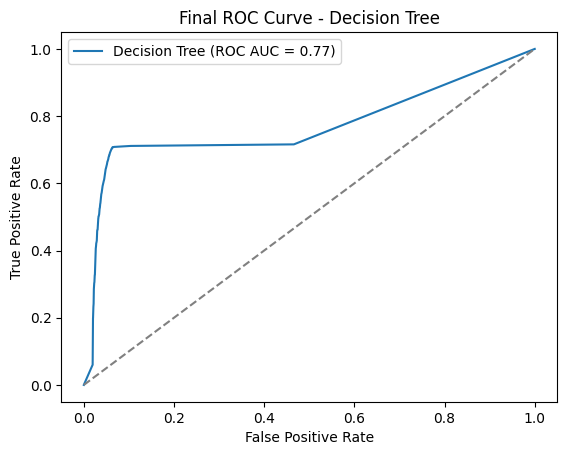

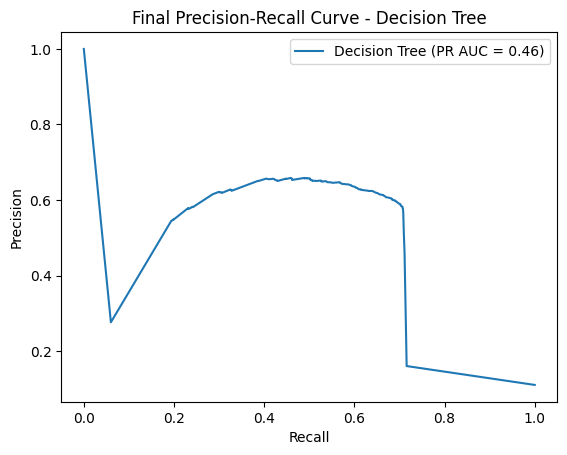


Final Training for KNN

Final Metrics for KNN:
  Accuracy: 0.9002
  Precision: 0.5362
  Recall: 0.7363
  F1 Score: 0.6205
  ROC AUC: 0.8847
  PR AUC: 0.7030
  Class Accuracies: {'non_bankrupt': 0.920618737915275, 'bankrupt': 0.7363187588152327}


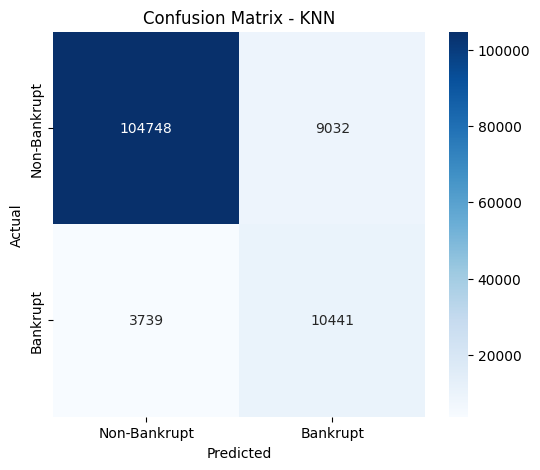

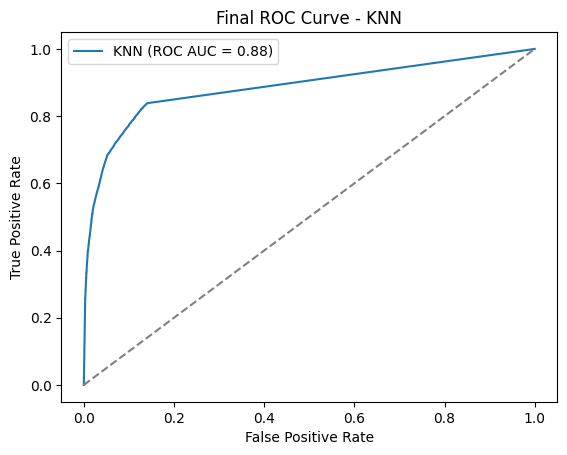

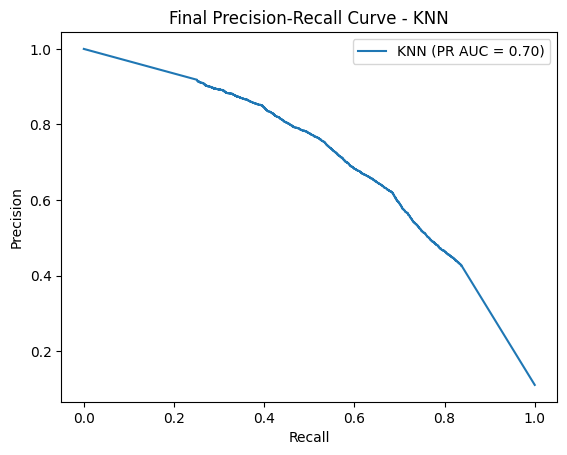


Final Training for Gradient Boosting

Final Metrics for Gradient Boosting:
  Accuracy: 0.9250
  Precision: 0.6221
  Recall: 0.8243
  F1 Score: 0.7091
  ROC AUC: 0.9599
  PR AUC: 0.8118
  Class Accuracies: {'non_bankrupt': 0.9375988750219723, 'bankrupt': 0.824330042313117}


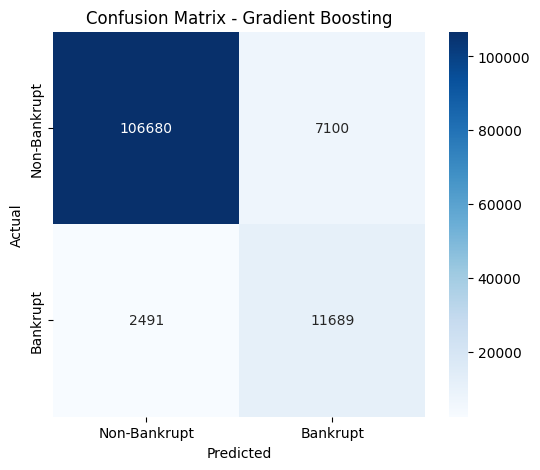

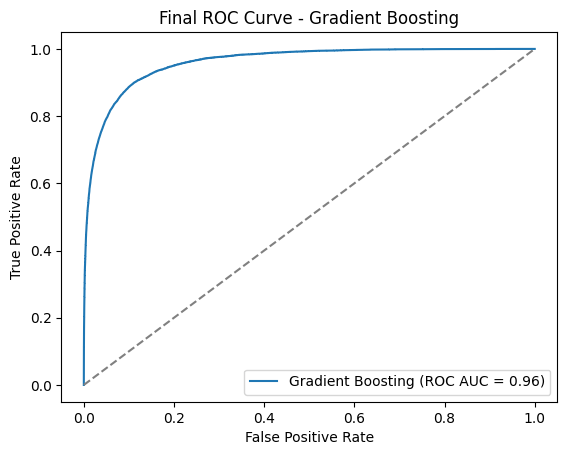

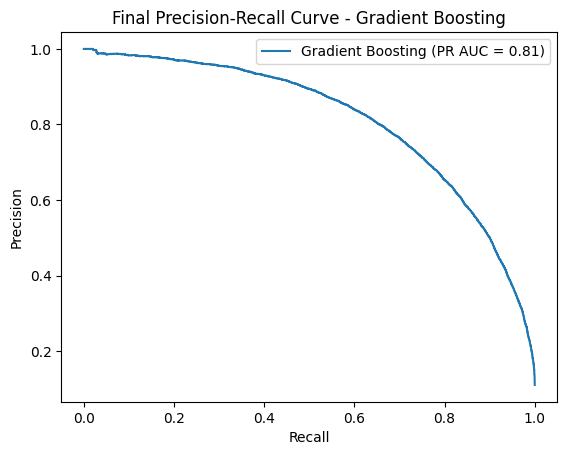


Final Training for Extra Trees

Final Metrics for Extra Trees:
  Accuracy: 0.7407
  Precision: 0.2946
  Recall: 0.9612
  F1 Score: 0.4510
  ROC AUC: 0.9437
  PR AUC: 0.7345
  Class Accuracies: {'non_bankrupt': 0.7131833362629636, 'bankrupt': 0.961212976022567}


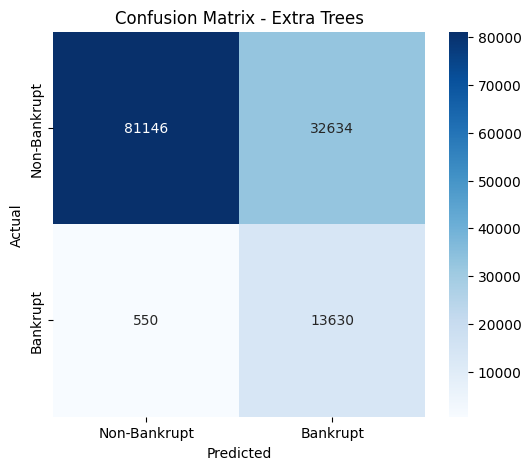

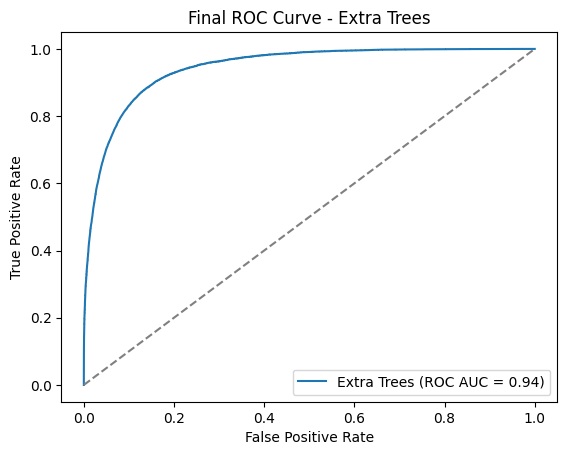

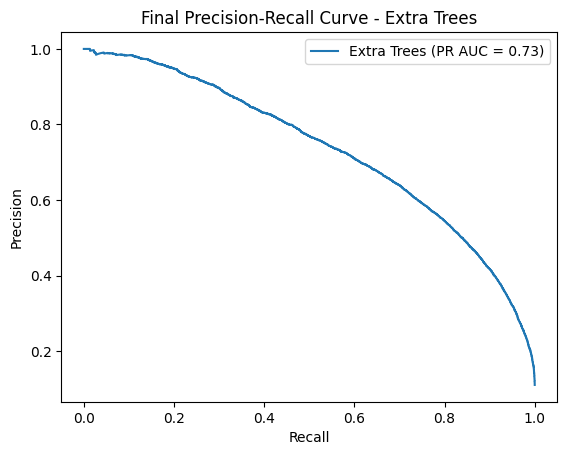


Final Training for Linear Discriminant Analysis (LDA)

Final Metrics for Linear Discriminant Analysis (LDA):
  Accuracy: 0.9194
  Precision: 0.6445
  Recall: 0.6075
  F1 Score: 0.6255
  ROC AUC: 0.9201
  PR AUC: 0.6703
  Class Accuracies: {'non_bankrupt': 0.9582439796097733, 'bankrupt': 0.6075458392101551}


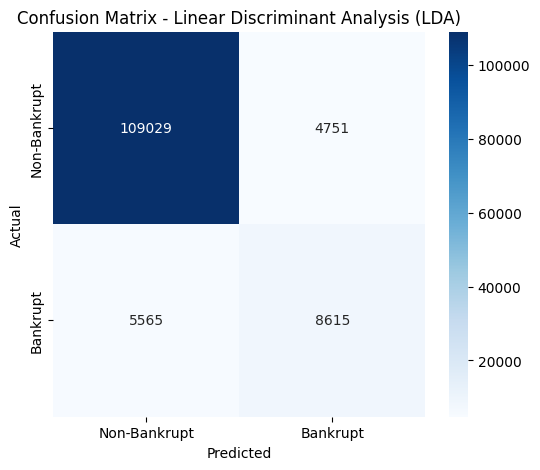

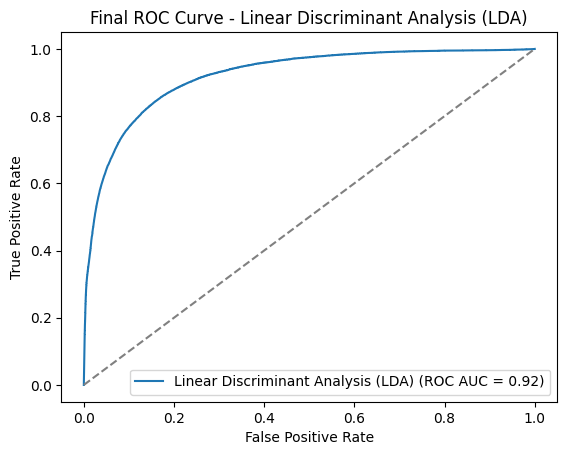

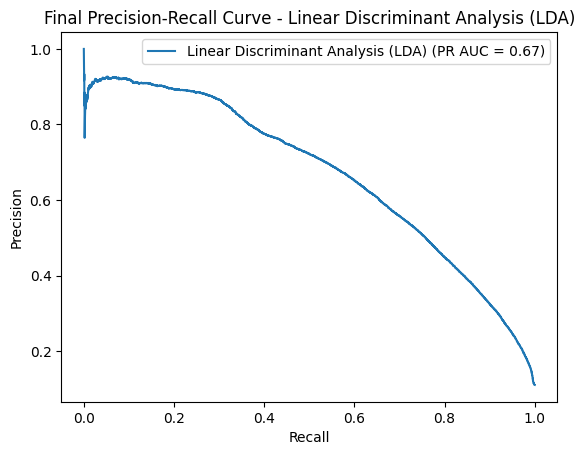


Final Training for Quadratic Discriminant Analysis (QDA)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(



Final Metrics for Quadratic Discriminant Analysis (QDA):
  Accuracy: 0.8985
  Precision: 0.7793
  Recall: 0.1168
  F1 Score: 0.2031
  ROC AUC: 0.7863
  PR AUC: 0.3922
  Class Accuracies: {'non_bankrupt': 0.9958780101951134, 'bankrupt': 0.11678420310296192}


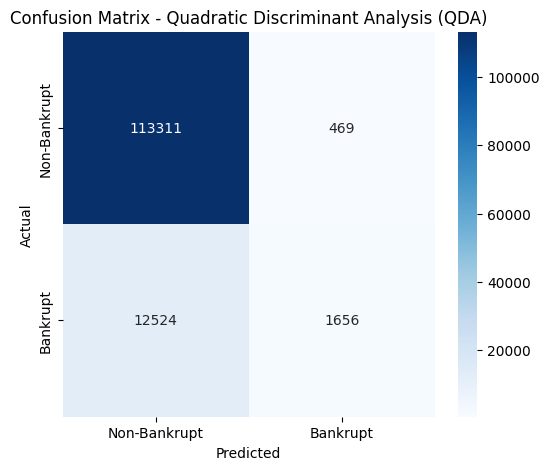

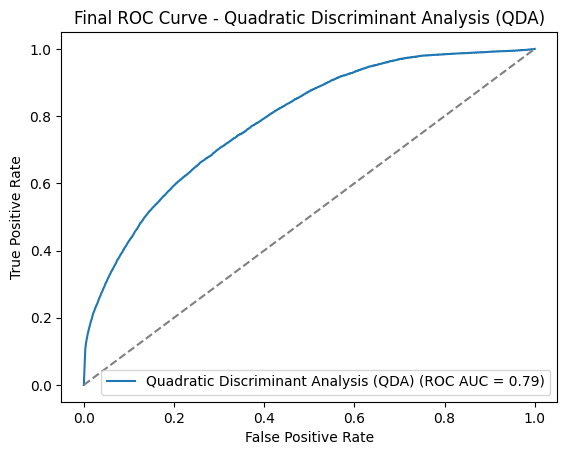

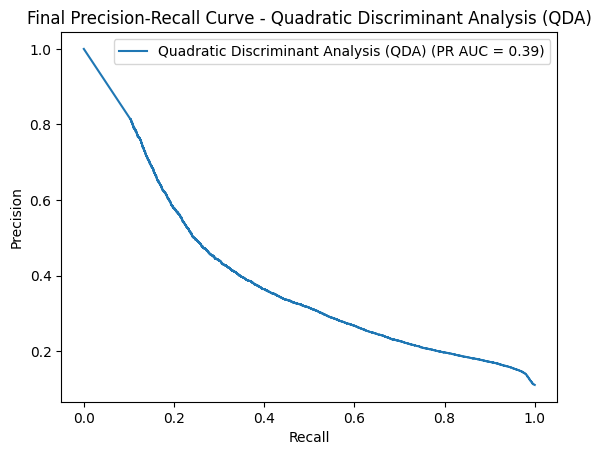

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]
        best_threshold = 0.5
        best_f1 = 0

        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)

        # Metrics
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        class_acc = {
            "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
            "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
        }
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Class Accuracies": class_acc
        })

        #curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    #mean threshold
    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

# Display Cross-validation Metrics
for model_name in models.keys():
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}:")
        for metric, value in fold_metrics.items():
            if metric != "Fold" and metric != "Class Accuracies":
                print(f"    {metric}: {value:.4f}")
        print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

    # Plot cross-validation ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title(f"Cross-validation ROC Curves - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Cross-validation Precision-Recall Curves - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display final metrics
    print(f"\nFinal Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

     # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save final curves
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_curves_final[model_name] = (fpr, tpr)
    pr_curves_final[model_name] = (pr_curve_precision, pr_curve_recall)

    # Plot final curves
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


Evaluating Logistic Regression on Test Data

Metrics for Logistic Regression:
  Accuracy: 0.8501
  Precision: 0.4169
  Recall: 0.8847
  F1 Score: 0.5667
  ROC AUC: 0.9369
  PR AUC: 0.7084
  Class Accuracies: {'non_bankrupt': 0.8457901212866936, 'bankrupt': 0.8846967559943583}


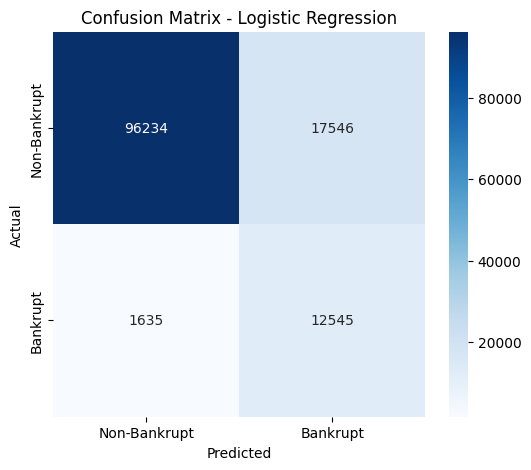

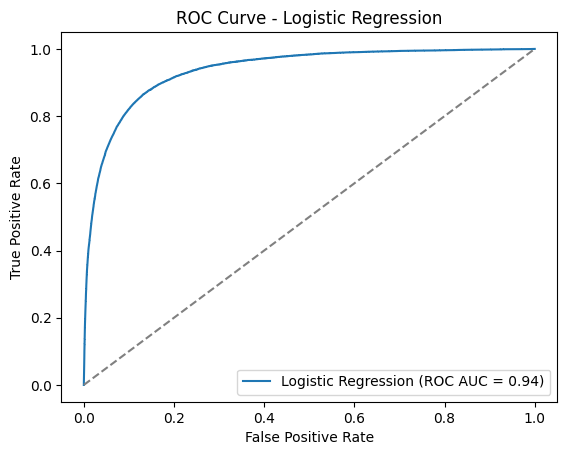

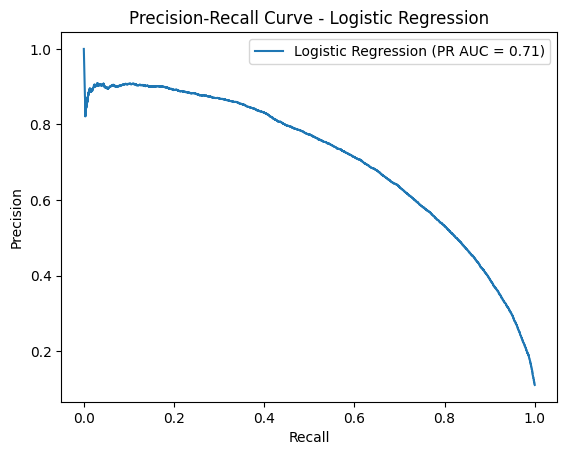

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Re-evaluate saved models
final_results = {}
pr_curves_final = {}
roc_curves_final = {}
for model_name, model in loaded_models.items():
    print(f"\nEvaluating {model_name} on Test Data")

    y_test_proba = model.predict_proba(X_test)[:, 1]  # Assuming predict_proba is available
    y_test_pred = (y_test_proba >= 0.5).astype(int)  # Default threshold 0.5

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Store results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display metrics
    print(f"\nMetrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot PR Curve
    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


#Coefficient

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.03090183  0.02050591  0.11902952 -1.23800312 -0.33723922 -0.02985345
  -0.3935738  -0.06385103  0.36302504 -0.01508767  0.         -0.07896621
  -0.57493834 -0.24331605 -0.42465868  0.38475074  0.36261586  0.06576221
  -0.4848832  -0.4951252   0.14210234 -0.08203404  0.          0.62516712
  -0.01981733  0.01813284 -0.00700119  0.92422823  0.3563766   1.21853683
  -0.22336822 -0.42533065 -1.41777241 -1.15519519 -0.31314186 -0.84717239
  -0.04401479 -0.04337563 -0.10774717 -0.27936369  0.00284669  0.38363458
  -0.70091076 -0.5584544  -1.36267191 -0.00494322  0.14179673  0.04827188
   0.57144033  0.26030563  0.09157439 -0.14988205 -0.07401217  1.71811803
   0.06594013 -0.12404436 -0.04470971 -0.36013205 -0.12095432 -0.82440769]]
Intercept: [-1.94278076]


In [ ]:
coefficients = model.coef_.flatten()
intercept = model.intercept_[0]
feature_names = X.columns.tolist()
feature_names_with_intercept = ['Intercept'] + feature_names
all_coefficients = [intercept] + coefficients.tolist()
coef_df = pd.DataFrame({
    'Feature': feature_names_with_intercept,
    'Coefficient': all_coefficients
})
output_file = 'logistic_regression_coefficients.xlsx'
coef_df.to_excel(output_file, index=False)
print(f"Coefficients saved to {output_file}")

Coefficients saved to logistic_regression_coefficients.xlsx
